In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

## Problem Statement
In this data we have one independent feature (Hours) and one dependent variable (marks). we have to train SVR model to understand the relationship between hours and marks to predict student's marks based on their number of hours dedicated to studies

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
df

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


## EDA

In [3]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [6]:
df.isnull().sum()

Hours of Study    0
Marks             0
dtype: int64

In [7]:
df.rename(columns={'Hours of Study':'Hours'},inplace=True)

In [8]:
df

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


Text(0, 0.5, 'Marks')

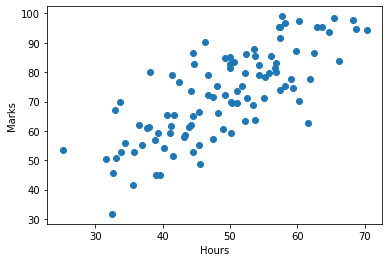

In [9]:
plt.scatter(df.Hours, df.Marks)
plt.xlabel('Hours')
plt.ylabel('Marks')

<AxesSubplot:>

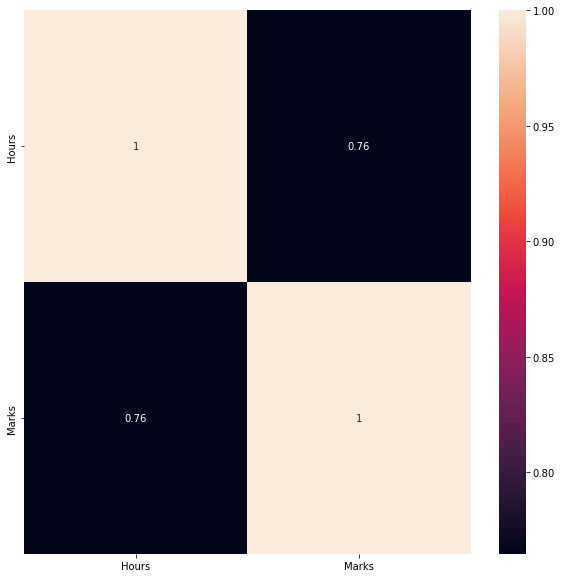

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

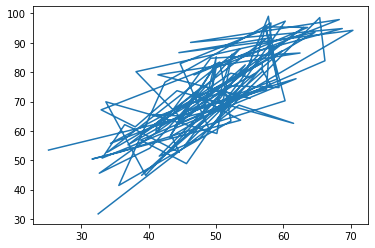

In [11]:
plt.plot(df.Hours,df.Marks)

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
y=df.iloc[:,-1].values
x=df.iloc[:,:-1].values

In [14]:
y

array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
       78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
       55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
       60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319,
       83.87856466, 98.5912173 , 57.25181946, 51.39174408, 75.38065167,
       74.76556403, 95.45505292, 95.22936602, 79.05240617, 83.43207142,
       63.35879032, 41.4128853 , 76.61734128, 96.76956643, 74.08413012,
       66.58814441, 77.76848242, 50.71958891, 62.12457082, 60.81024665,
       52.68298337, 58.56982472, 82.90598149, 61.4247098 , 95.2441528 ,
       45.57058882, 54.0840548 , 87.99445276, 52.72549438, 93.57611869,
       80.16627545, 65.10171157, 65.56230126, 65.28088692, 73.43464155,
       71.13972786, 79.10282968, 86.52053844, 84.74269781, 59.35885025,
       61.68403752, 69.84760416, 86.09829121, 59.10883927, 69.89968164,
       44.86249071, 85.49806778, 95.53668685, 70.25193442, 52.72

In [15]:
stanscale=StandardScaler()

In [16]:
x=stanscale.fit_transform(x.reshape(-1,1))
y=stanscale.fit_transform(y.reshape(-1,1))

In [17]:
x

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [18]:
y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=8)

In [20]:
x_train.shape

(80, 1)

In [21]:
model=SVR(kernel='rbf')

In [22]:
model.fit(x_train,y_train)

C:\Users\Ashwin\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array([ 0.8782171 , -0.58269046,  0.3837441 ,  1.10063278,  0.50841755,
       -0.84818315,  0.19266388,  0.14814554,  0.29960171,  0.72270062,
       -0.04943399, -0.3599459 ,  0.4548301 , -0.97356638, -0.10273767,
       -0.42902296,  0.1049606 ,  0.28694605, -0.16441721, -0.3835806 ])

In [25]:
y_test

array([[ 1.67581471],
       [-1.3649464 ],
       [-0.21538463],
       [ 1.53459818],
       [-0.05919921],
       [-1.22856288],
       [-0.16174092],
       [ 0.75357708],
       [ 0.92986895],
       [ 1.63545934],
       [-0.38416642],
       [-0.66293287],
       [ 0.69054936],
       [-0.74219   ],
       [-0.03229448],
       [-0.89032789],
       [ 0.8725898 ],
       [-0.57367894],
       [ 0.01403081],
       [-0.70156137]])

In [26]:
y_test=stanscale.inverse_transform(y_test)

In [27]:
y_test

array([[97.37989686],
       [51.39174408],
       [68.77759598],
       [95.2441528 ],
       [71.13972786],
       [53.45439421],
       [69.58889785],
       [83.43207142],
       [86.09829121],
       [96.76956643],
       [66.22495789],
       [62.00892325],
       [82.47884676],
       [60.81024665],
       [71.54663223],
       [58.56982472],
       [85.23200734],
       [63.35879032],
       [72.24725107],
       [61.4247098 ]])

In [28]:
y_pred=stanscale.inverse_transform(y_pred.reshape(-1,1))

In [29]:
y_pred

array([[85.31711397],
       [63.22250097],
       [77.83875616],
       [88.68090551],
       [79.7243043 ],
       [59.20721733],
       [74.94887896],
       [74.27558813],
       [76.56619542],
       [82.9650991 ],
       [71.28741613],
       [66.59126642],
       [78.91385336],
       [57.31093453],
       [70.48125672],
       [65.54655221],
       [73.62246367],
       [76.37479252],
       [69.54842183],
       [66.23381766]])

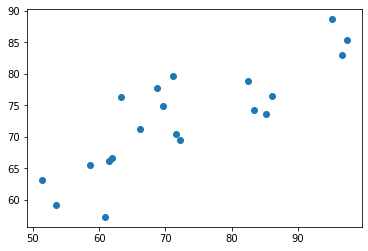

In [30]:
plt.scatter(y_test,y_pred)

In [31]:
stanscale.inverse_transform(model.predict([[5]]).reshape(-1,1))

array([[72.96442809]])

In [32]:
stanscale.inverse_transform(model.predict([[10]]).reshape(-1,1))

array([[72.9602617]])

In [33]:
stanscale.inverse_transform(model.predict([[12]]).reshape(-1,1))

array([[72.9602617]])

In [34]:
stanscale.inverse_transform(model.predict([[14]]).reshape(-1,1))

array([[72.9602617]])

In [35]:
stanscale.inverse_transform(model.predict([[3]]).reshape(-1,1))

array([[81.0895205]])

In [36]:
r2_score(y_test,y_pred)

0.6409645813712227

In [37]:
mean_squared_error(y_test,y_pred)

68.37212697966153

In [38]:
mean_absolute_error(y_test,y_pred)

7.429653362584466